In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cert-anomaly-detection/file.csv


In [3]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/kaggle/input/cert-anomaly-detection/file.csv')

print("Train Data Shape:", train_data.shape)

print(train_data.head())

Train Data Shape: (445581, 6)
                         id                 date     user       pc  \
0  {L9G8-J9QE34VM-2834VDPB}  01/02/2010 07:23:14  MOH0273  PC-6699   
1  {H0W6-L4FG38XG-9897XTEN}  01/02/2010 07:26:19  MOH0273  PC-6699   
2  {M3Z0-O2KK89OX-5716MBIM}  01/02/2010 08:12:03  HPH0075  PC-2417   
3  {E1I4-S4QS61TG-3652YHKR}  01/02/2010 08:17:00  HPH0075  PC-2417   
4  {D4R7-E7JL45UX-0067XALT}  01/02/2010 08:24:57  HSB0196  PC-8001   

       filename                                            content  
0  EYPC9Y08.doc  D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...  
1  N3LTSU3O.pdf  25-50-44-46-2D carpenters 25 landed strait dis...  
2  D3D3WC9W.doc  D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...  
3  QCSW62YS.doc  D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...  
4  AU75JV6U.jpg                                              FF-D8  


In [4]:
print("Total observations:", len(train_data))
print("Users:", train_data['user'].nunique())
print("Unique PCs:", train_data['pc'].nunique())
print("Unique filenames :", train_data['filename'].nunique())
print("Unique content:", train_data['content'].nunique())

Total observations: 445581
Users: 264
Unique PCs: 956
Unique filenames : 445581
Unique content: 423033


In [5]:
train_data.isna().sum()


id          0
date        0
user        0
pc          0
filename    0
content     0
dtype: int64

In [6]:
train_data.dtypes


id          object
date        object
user        object
pc          object
filename    object
content     object
dtype: object

In [7]:
# Convert 'time' column to datetime and sort by time
train_data['date'] = pd.to_datetime(train_data['date'], format='%m/%d/%Y %H:%M:%S')
train_data = train_data.sort_values(by='date')

In [8]:
# Temporal range of the dataset
start_time = train_data['date'].min()
end_time = train_data['date'].max()

In [9]:
print(f"First observation: {start_time}\nLatest observation: {end_time}")
print("Total observations:", len(train_data))
print("Users:", train_data['user'].nunique())
print("Unique PCs:", train_data['pc'].nunique())
print("Unique filenames :", train_data['filename'].nunique())
print("Unique content:", train_data['content'].nunique())

First observation: 2010-01-02 07:23:14
Latest observation: 2011-05-16 23:22:34
Total observations: 445581
Users: 264
Unique PCs: 956
Unique filenames : 445581
Unique content: 423033


**2. Filter Data to Select Specific Users**

In [10]:
# Select a subset of users
unique_users = train_data['user'].unique()
selected_users = np.random.choice(unique_users, 5, replace=False)
filtered_df = train_data[train_data['user'].isin(selected_users)]

In [11]:
print("Total observations:", len(filtered_df))

print("Unique accounts:", filtered_df['user'].nunique())
print("Users:", filtered_df['user'].nunique())
print("Unique PCs:", filtered_df['pc'].nunique())
print("Unique filenames :", filtered_df['filename'].nunique())
print("Unique content:", filtered_df['content'].nunique())

Total observations: 8713
Unique accounts: 5
Users: 5
Unique PCs: 5
Unique filenames : 8713
Unique content: 8261


**2.1 Filter Data to Select Specific Time Ranges**

In [12]:
# Define the time range
# start_date = '2010-01-02'
# end_date = '2010-01-16'

start_date = '2010-01-02'
end_date = '2011-05-16'

# Filter data within the time range
sample_df = filtered_df[filtered_df['date'].between(start_date, end_date)]
sample_df.set_index('date', inplace=True, drop=False)


In [13]:
print("Total observations:", len(sample_df))
print("Unique users:", sample_df['user'].nunique())
print("Unique PCs:",  sample_df['pc'].nunique())
print("Unique filenames :",  sample_df['filename'].nunique())
print("Unique content:", sample_df['content'].nunique())

Total observations: 8694
Unique users: 5
Unique PCs: 5
Unique filenames : 8694
Unique content: 8242


In [14]:
sample_df.columns

Index(['id', 'date', 'user', 'pc', 'filename', 'content'], dtype='object')

In [15]:
sample_df = sample_df.drop(columns=['id', 'content'])


In [16]:
sample_df.shape

(8694, 4)

In [17]:
categorical_features=[feature for feature in sample_df.columns if sample_df[feature].dtypes=='O']


In [18]:
categorical_features

['user', 'pc', 'filename']

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for feature in categorical_features:
    sample_df[feature + '_encoded'] = le.fit_transform(sample_df[feature])

In [20]:
sample_df.head(3)

,date,user,pc,filename,user_encoded,pc_encoded,filename_encoded
date,,,,,,,
2010-01-04 09:56:49,2010-01-04 09:56:49,CWR0502,PC-3737,8KJKUBM5.doc,1,1,2032
2010-01-04 10:20:35,2010-01-04 10:20:35,CWR0502,PC-3737,VV1QALXO.txt,1,1,7655
2010-01-04 10:23:00,2010-01-04 10:23:00,CWR0502,PC-3737,9MTSIG9A.doc,1,1,2300


In [21]:
# Drop the original categorical columns 
sample_df = sample_df.drop(columns=categorical_features)
sample_df.head(5)

,date,user_encoded,pc_encoded,filename_encoded
date,,,,
2010-01-04 09:56:49,2010-01-04 09:56:49,1,1,2032
2010-01-04 10:20:35,2010-01-04 10:20:35,1,1,7655
2010-01-04 10:23:00,2010-01-04 10:23:00,1,1,2300
2010-01-04 10:59:04,2010-01-04 10:59:04,0,3,4641
2010-01-04 11:03:44,2010-01-04 11:03:44,0,3,4849


**4.Pre-processing of Time column**

In [22]:
# Extract numerical features

sample_df['hour'] = sample_df['date'].dt.hour
sample_df['day_of_week'] = sample_df['date'].dt.day_of_week
sample_df['month'] = sample_df['date'].dt.month

In [23]:
sample_df.drop('date', axis=1, inplace=True)


In [24]:
sample_df.head(4)

,user_encoded,pc_encoded,filename_encoded,hour,day_of_week,month
date,,,,,,
2010-01-04 09:56:49,1,1,2032,9,0,1
2010-01-04 10:20:35,1,1,7655,10,0,1
2010-01-04 10:23:00,1,1,2300,10,0,1
2010-01-04 10:59:04,0,3,4641,10,0,1


**5.3 Robust Scaling**

- scales the features using statistics that are robust to outliers, such as the median and the interquartile range (IQR).
- resistant to the influence of outliers compared to standard scaling techniques like Min-Max Scaling or Standard Scaling.

In [25]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(robust_scaler.fit_transform(sample_df), columns=sample_df.columns)

print("Original DataFrame:")
print(sample_df)
print("\nScaled DataFrame:")
print(scaled_df)

Original DataFrame:
                     user_encoded  pc_encoded  filename_encoded  hour  \
date                                                                    
2010-01-04 09:56:49             1           1              2032     9   
2010-01-04 10:20:35             1           1              7655    10   
2010-01-04 10:23:00             1           1              2300    10   
2010-01-04 10:59:04             0           3              4641    10   
2010-01-04 11:03:44             0           3              4849    11   
...                           ...         ...               ...   ...   
2011-05-13 16:22:21             0           3              3508    16   
2011-05-13 16:26:32             0           3              3611    16   
2011-05-13 16:31:34             1           1              8169    16   
2011-05-13 16:35:02             1           1              6532    16   
2011-05-13 16:39:54             1           1              7178    16   

                     day_of_we

**6. Feature Extraction**
- Identify the most significative variables of the dataset.

**6.1 Correlation Matrix** 
- Features with high correlation coefficients are likely to be more important.

In [26]:
# Get the feature names from the original DataFrame
original_feature_names = sample_df.columns

# Apply correlation matrix 
corr_matrix = scaled_df.corr()

# Create a mapping dictionary
feature_mapping = {f'feature{i+1}': original_feature_names[i] for i in range(len(original_feature_names))}



In [27]:
# Rename the columns in the correlation matrix
corr_matrix = corr_matrix.rename(columns=feature_mapping, index=feature_mapping)
corr_matrix

,user_encoded,pc_encoded,filename_encoded,hour,day_of_week,month
user_encoded,1.000000,-0.243783,-0.000347,0.030351,-0.009698,-0.002731
pc_encoded,-0.243783,1.000000,-0.005364,-0.045581,-0.015325,0.006787
filename_encoded,-0.000347,-0.005364,1.000000,0.001731,0.002202,0.002874
hour,0.030351,-0.045581,0.001731,1.000000,-0.019940,-0.019708
day_of_week,-0.009698,-0.015325,0.002202,-0.019940,1.000000,-0.005207
month,-0.002731,0.006787,0.002874,-0.019708,-0.005207,1.000000


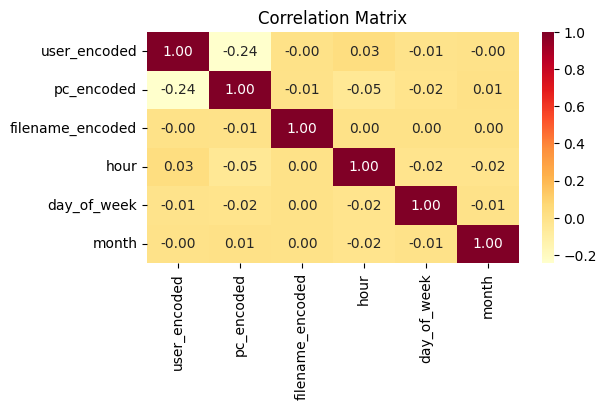

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
scaled_df = scaled_df.drop('month', axis=1)
scaled_df.columns

Index(['user_encoded', 'pc_encoded', 'filename_encoded', 'hour',
       'day_of_week'],
      dtype='object')

**DBSCAN**

In [30]:
from sklearn.neighbors import NearestNeighbors

# Number of features-- in our case 3, Twice the number of features
min_samples = scaled_df.shape[1] * 2
k = min_samples if min_samples>2 else 2
nrbs = NearestNeighbors(n_neighbors=k).fit(scaled_df)
distances, indicies = nrbs.kneighbors(scaled_df)
print("Min number of samples:" + str(min_samples))
print("Shape of distances matrix:" + str(distances.shape) + "\n")

for enum, row in enumerate(distances[:5]):
    print("Observation: " + str(enum) + ": " + str([round(x,2) for x in row]))

Min number of samples:10
Shape of distances matrix:(8694, 10)

Observation: 0: [0.0, 0.02, 0.02, 0.05, 0.12, 0.13, 0.18, 0.23, 0.25, 0.25]
Observation: 1: [0.0, 0.01, 0.04, 0.05, 0.09, 0.25, 0.25, 0.25, 0.28, 0.29]
Observation: 2: [0.0, 0.0, 0.02, 0.07, 0.1, 0.2, 0.25, 0.25, 0.25, 0.25]
Observation: 3: [0.0, 0.0, 0.0, 0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.06]
Observation: 4: [0.0, 0.0, 0.01, 0.02, 0.03, 0.03, 0.03, 0.03, 0.04, 0.05]


In [31]:
# the last cell of each row represents the distance of the k'th farthest point
scaled_df['knn_farthest_dist'] = distances[:,-1]
scaled_df.head()

,user_encoded,pc_encoded,filename_encoded,hour,day_of_week,knn_farthest_dist
0,1.0,-2.0,-0.532497,-0.75,-1.0,0.253113
1,1.0,-2.0,0.761187,-0.50,-1.0,0.288518
2,1.0,-2.0,-0.470839,-0.50,-1.0,0.252797
3,0.0,0.0,0.067756,-0.50,-1.0,0.057978
4,0.0,0.0,0.115610,-0.25,-1.0,0.051306


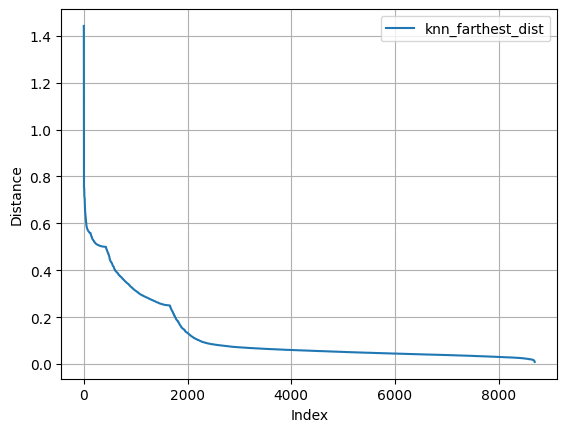

In [32]:
import matplotlib.pyplot as plt
scaled_df.sort_values('knn_farthest_dist', ascending=False).reset_index()[['knn_farthest_dist']].plot()
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClusterMixin

class DBSCANWrapper(BaseEstimator, ClusterMixin):
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.dbscan = DBSCAN(eps=self.eps, min_samples=self.min_samples)
    
    def fit(self, X, y=None):
        self.dbscan.fit(X)
        return self
    
    def fit_predict(self, X, y=None):
        return self.dbscan.fit_predict(X)
    
def silhouette_scorer(estimator, X):
    clusters = estimator.fit_predict(X)
    if len(set(clusters)) > 1:
        score = silhouette_score(X, clusters)
    else:
        score = -1  # or some other value to indicate that the score isn't valid
    return score


param_grid = {
    'eps': [0.2, 0.5, 0.7, 1.0],
    'min_samples': [3, 5, 10, 12, 15]
}

dbscan = DBSCANWrapper()
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, cv=3)

grid_search.fit(scaled_df)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Parameters: {best_params} - Best Silhouette Score: {best_score}")


Best Parameters: {'eps': 0.2, 'min_samples': 3} - Best Silhouette Score: 0.09900343464559515


**7.1.3 Retrain the model with the best parameters.**

In [34]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
epsilon = 0.2
min_samples=3
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_df)

**7.3 Identify the core and the outliers for DBSCAN**

In [35]:
# Identify the core and the outliers
import numpy as np

core_samples = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

In [36]:
# Check the number of clusters after DBSCAN algorithm (ignoring noise if present)

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 244
Estimated number of noise points: 477


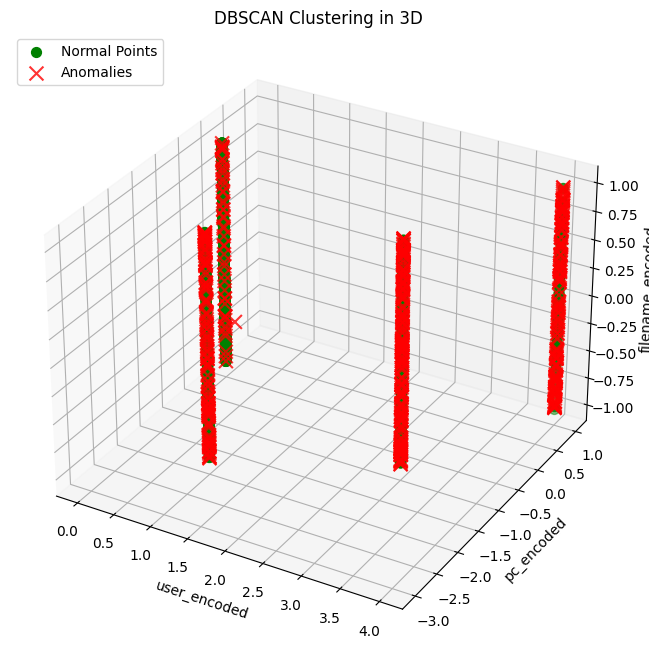

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import numpy as np

X = scaled_df[['user_encoded', 'pc_encoded', 'filename_encoded']].values


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the normal (clustered) points in blue
normal_points = ax.scatter(X[labels != -1, 0], X[labels != -1, 1], X[labels != -1, 2], c='green', s=50)

# Plot the anomalies (noise points) in red with 'x' markers
anomalies = ax.scatter(X[labels == -1, 0], X[labels == -1, 1], X[labels == -1, 2], marker='x', c='#FF0000', s=100, alpha=0.8)

# Set labels and title
ax.set_xlabel('user_encoded')
ax.set_ylabel('pc_encoded')
ax.set_zlabel('filename_encoded')
ax.set_title('DBSCAN Clustering in 3D')

# Add a legend
ax.legend([normal_points, anomalies], ['Normal Points', 'Anomalies'], loc='upper left')

plt.show()

# **8. Isolation forest**
#### 8.1 Hyperparamter tuning
Contamination: This is a parameter that the algorithm is quite sensitive to; it refers to the expected proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples.

In [38]:
scaled_df.dtypes

user_encoded         float64
pc_encoded           float64
filename_encoded     float64
hour                 float64
day_of_week          float64
knn_farthest_dist    float64
dtype: object

In [39]:
scaled_df = scaled_df.drop(['knn_farthest_dist'], axis=1)


In [40]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Custom scoring function for unsupervised learning
def unsupervised_scorer(estimator, X):
    # Predict the anomaly scores
    scores_pred = estimator.decision_function(X)
    
     # Classify points as normal or anomalous based on the contamination threshold
    labels = scores_pred < estimator.contamination
    
    # Compute the silhouette score
    try:
        silhouette = silhouette_score(X, labels)
        # Check if the silhouette score is NaN
        if np.isnan(silhouette):
            return -1  # Return a default value for NaN (you can choose another value if preferred)
        return silhouette
    except ValueError:
        # Handle cases where silhouette score cannot be computed
        return -1  # Return a default value for errors
    
    
    
    # Compute the silhouette score
    silhouette = silhouette_score(X, scores_pred < estimator.contamination)
    return silhouette

# Initialize the Isolation Forest model with contamination parameter
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Define a range of parameters to tune, excluding the contamination parameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.25, 0.5, 0.75],
    'max_features': [1.0, 0.7, 0.5]
}

X = scaled_df[['user_encoded', 'pc_encoded', 'filename_encoded']].values

# Set up the grid search with the custom scorer
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring=unsupervised_scorer, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

# the best estimator for further analysis
best_iso_forest = grid_search.best_estimator_

Best parameters: {'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 150}
Best score: 0.6872090408456715


In [46]:
from sklearn.ensemble import IsolationForest

# Retrain the model with the best hyperparameters

iso_forest = IsolationForest(**grid_search.best_params_)
iso_labels = iso_forest.fit_predict(scaled_df)

In [47]:
n_clusters_ = len(set(iso_labels)) - (1 if -1 in iso_labels else 0)
n_noise_ = list(iso_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 1
Estimated number of noise points: 1818


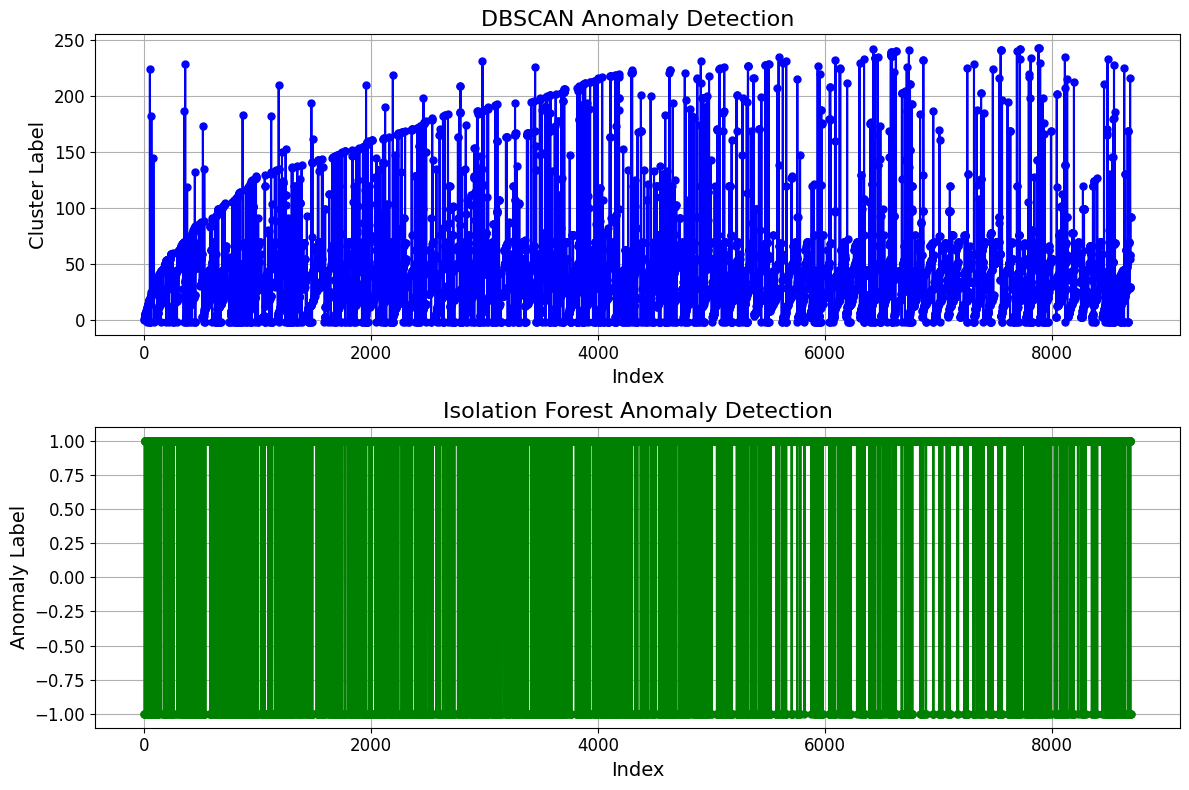

In [48]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Plot DBSCAN labels
plt.subplot(2, 1, 1)
plt.plot(scaled_df.index, clusters, marker='o', linestyle='-', color='b', markersize=5)
plt.title('DBSCAN Anomaly Detection', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Cluster Label', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot Isolation Forest labels
plt.subplot(2, 1, 2)
plt.plot(scaled_df.index, iso_labels, marker='o', linestyle='-', color='g', markersize=5)
plt.title('Isolation Forest Anomaly Detection', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Anomaly Label', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

**DBSCAN Silhouette Coefficient**

In [49]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(scaled_df, clusters)
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: 0.06278115693757053


**Isolation Forest Silhouette Coefficient**


In [50]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient
silhouette_isolation_f = silhouette_score(scaled_df, iso_labels)
print(f"Silhouette Coefficient: {silhouette_isolation_f}")

Silhouette Coefficient: 0.4357889705937029


# **TEST SU TP;FP, FN**

Manually introduce anomalies into our dataset to test if DBSCAN can identify them, although with the large number of clusters found by DBSCAN (over 100), it may be challenging. 

**Introduce Anomalies**
- create a function to introduce anomalies by modifying existing data points or generating new ones. 

In [51]:
import pandas as pd
import numpy as np

# Assuming sample_df is your DataFrame after preprocessing
def introduce_anomalies(df, num_anomalies=5):
    # Randomly select indices to introduce anomalies
    anomaly_indices = np.random.choice(df.index, num_anomalies, replace=False)
    
    # Create anomalies by modifying existing data points
    for idx in anomaly_indices:
        # Introduce anomalies by adding a large value to the 'hour' column
        df.at[idx, 'hour'] += np.random.randint(10, 50)  # Shift hour by 10 to 50
        # Optionally modify other features to make them more anomalous
        df.at[idx, 'user_encoded'] = df['user_encoded'].max() + 1  # New user
        df.at[idx, 'pc_encoded'] = df['pc_encoded'].max() + 1  # New PC
        df.at[idx, 'filename_encoded'] = df['filename_encoded'].max() + 1  # New filename

    return df

# Introduce anomalies into the sample_df
sample_df_with_anomalies = introduce_anomalies(scaled_df.copy(), num_anomalies=5)


**Run DBSCAN**
- Now we can run DBSCAN on the modified DataFrame to see if it identifies the introduced anomalies:

In [52]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Scale the data
robust_scaler = RobustScaler()
scaled_df = pd.DataFrame(robust_scaler.fit_transform(sample_df_with_anomalies), columns=sample_df_with_anomalies.columns)

# Run DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=3)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
scaled_df['cluster'] = clusters

# Check the number of clusters found
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
print(f"Number of clusters found: {num_clusters}")

# Optionally compute silhouette score
if num_clusters > 1:
    score = silhouette_score(scaled_df.drop('cluster', axis=1), clusters)
    print(f"Silhouette Score: {score}")
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")


Number of clusters found: 243
Silhouette Score: 0.06359562156691334


In [53]:
# Count noise points
num_noise_points = (scaled_df['cluster'] == -1).sum()
print(f"Number of noise points (potential False Positives): {num_noise_points}")


Number of noise points (potential False Positives): 462


# **OneClassSVM**
- used for unsupervised learning. It is specifically designed for anomaly detection tasks where the model learns from a dataset containing only normal instances and identifies outliers or anomalies based on that learned representation.

**Key Points About One-Class SVM in Unsupervised Learning:**
- Unsupervised Nature: One-Class SVM does not require labeled data. Instead, it learns to identify the boundary of the normal data distribution and classifies points outside this boundary as anomalies.

In [54]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(gamma='auto', nu=0.1)  # nu is the upper bound on the fraction of margin errors
oc_svm.fit(scaled_df)
anomaly_scores = oc_svm.predict(scaled_df)


   user_encoded  pc_encoded  filename_encoded  hour  day_of_week  cluster  \
0           1.0        -2.0         -0.532482 -0.75         -1.0        0   
1           1.0        -2.0          0.760607 -0.50         -1.0        1   
2           1.0        -2.0         -0.470852 -0.50         -1.0        2   
3           0.0         0.0          0.067495 -0.50         -1.0        3   
4           0.0         0.0          0.115327 -0.25         -1.0        4   

   anomaly  
0        1  
1        1  
2        1  
3        1  
4        1  


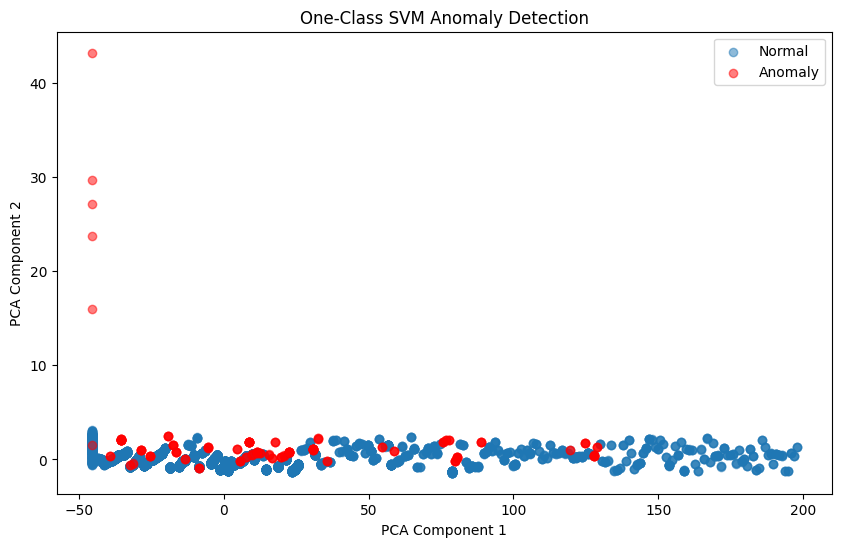

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a DataFrame to hold the results
results_df = pd.DataFrame(scaled_df)
results_df['anomaly'] = anomaly_scores

# Display the first few rows of the results
print(results_df.head())
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Create a scatter plot of the results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[results_df['anomaly'] == 1, 0], reduced_data[results_df['anomaly'] == 1, 1], label='Normal', alpha=0.5)
plt.scatter(reduced_data[results_df['anomaly'] == -1, 0], reduced_data[results_df['anomaly'] == -1, 1], label='Anomaly', color='red', alpha=0.5)
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [66]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score

# Define a range of hyperparameters to test
nu_values = [0.05, 0.1, 0.2]
gamma_values = ['scale', 'auto']

best_score = -1
best_params = {}

for nu in nu_values:
    for gamma in gamma_values:
        # Fit the One-Class SVM model
        oc_svm = OneClassSVM(nu=nu, gamma=gamma)
        oc_svm.fit(scaled_df)
        
        # Predict anomalies
        anomaly_scores = oc_svm.predict(scaled_df)
        
        # Calculate silhouette score for normal points
        if len(set(anomaly_scores)) > 1:  # Ensure there are both normal and anomalous points
            score = silhouette_score(scaled_df, anomaly_scores)
            print(f"nu: {nu}, gamma: {gamma}, Silhouette Score: {score}")
            
            # Update best score and parameters
            if score > best_score:
                best_score = score
                best_params = {'nu': nu, 'gamma': gamma}

print(f"Best parameters: {best_params} with Silhouette Score: {best_score}")


nu: 0.05, gamma: scale, Silhouette Score: 0.5834809120541171
nu: 0.05, gamma: auto, Silhouette Score: 0.5604061270658159
nu: 0.1, gamma: scale, Silhouette Score: 0.5733129506929112
nu: 0.1, gamma: auto, Silhouette Score: 0.5618171782340953
nu: 0.2, gamma: scale, Silhouette Score: 0.5202089493586226
nu: 0.2, gamma: auto, Silhouette Score: 0.47444909588039497
Best parameters: {'nu': 0.05, 'gamma': 'scale'} with Silhouette Score: 0.5834809120541171


In [67]:
# Filter the anomalies
anomalies = results_df[results_df['anomaly'] == -1]
print(f"Number of detected anomalies: {len(anomalies)}")
print(anomalies.head())


Number of detected anomalies: 205
    user_encoded  pc_encoded  filename_encoded   hour  day_of_week  cluster  \
5            1.0        -2.0          0.983673  -0.25         -1.0        5   
20           3.0        -1.0          0.155801   0.75         -1.0        9   
40           1.0        -2.0         -0.155111   0.75         -0.5       16   
44           5.0         2.0          1.998850  15.75          0.0       -1   
47           1.0        -2.0          0.236978   0.00          0.0       19   

    anomaly  
5        -1  
20       -1  
40       -1  
44       -1  
47       -1  


# **Local Outlier Factor (LOF):**
- indeed used for unsupervised learning. It is an anomaly detection algorithm that identifies outliers based on the local density of data points. LOF measures the local density deviation of a given data point with respect to its neighbors, allowing it to detect anomalies in datasets without requiring labeled training data.

In [56]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
anomaly_scores = lof.fit_predict(scaled_df)


In [57]:
import pandas as pd

# Assuming scaled_df is your DataFrame with scaled features
anomaly_scores = lof.fit_predict(scaled_df)

# Count the number of anomalies detected
num_anomalies = (anomaly_scores == -1).sum()
print(f"Number of anomalies detected: {num_anomalies}")

# Create a DataFrame to hold the results
results_df = pd.DataFrame(scaled_df)
results_df['anomaly'] = anomaly_scores

# Display the first few rows of the results
print(results_df.head())


Number of anomalies detected: 205
   user_encoded  pc_encoded  filename_encoded  hour  day_of_week  cluster  \
0           1.0        -2.0         -0.532482 -0.75         -1.0        0   
1           1.0        -2.0          0.760607 -0.50         -1.0        1   
2           1.0        -2.0         -0.470852 -0.50         -1.0        2   
3           0.0         0.0          0.067495 -0.50         -1.0        3   
4           0.0         0.0          0.115327 -0.25         -1.0        4   

   anomaly  
0        1  
1        1  
2        1  
3        1  
4        1  


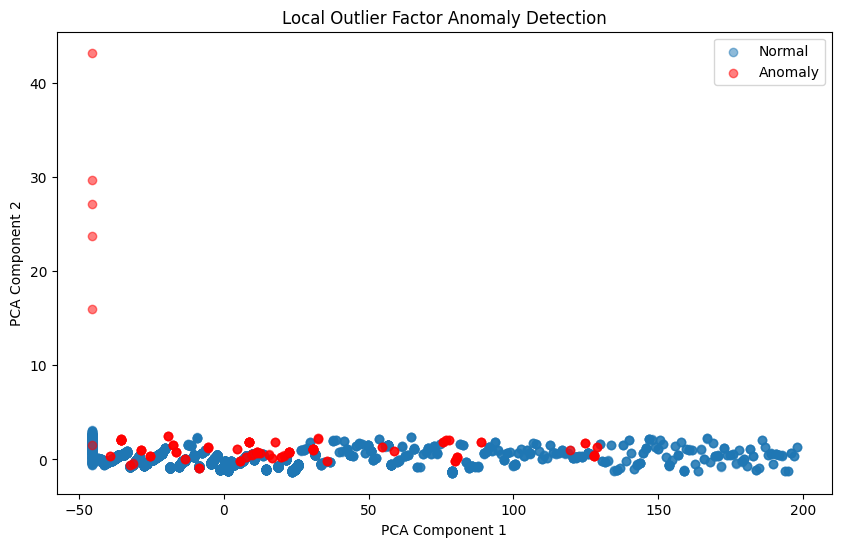

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Create a scatter plot of the results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[results_df['anomaly'] == 1, 0], reduced_data[results_df['anomaly'] == 1, 1], label='Normal', alpha=0.5)
plt.scatter(reduced_data[results_df['anomaly'] == -1, 0], reduced_data[results_df['anomaly'] == -1, 1], label='Anomaly', color='red', alpha=0.5)
plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [59]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for normal points
if len(set(anomaly_scores)) > 1:  # Ensure there are both normal and anomalous points
    score = silhouette_score(scaled_df, anomaly_scores)
    print(f"Silhouette Score: {score}")
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")


Silhouette Score: 0.20647783247386128


### **Combine multiple anomaly detection models like Isolation Forest and One-Class SVM using VotingClassifier.**
- is needed to create wrappers for each model since VotingClassifier is designed for classifiers and not for unsupervised models directly. However, we can create a custom ensemble approach.

In [60]:
from sklearn.base import BaseEstimator, OutlierMixin
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

class IsolationForestWrapper(BaseEstimator, OutlierMixin):
    def __init__(self, contamination='auto'):
        self.model = IsolationForest(contamination=contamination)

    def fit(self, X, y=None):
        self.model.fit(X)
        return self

    def predict(self, X):
        return self.model.predict(X)  # Returns 1 for normal, -1 for anomalies

class OneClassSVMWrapper(BaseEstimator, OutlierMixin):
    def __init__(self, nu=0.1, gamma='auto'):
        self.model = OneClassSVM(nu=nu, gamma=gamma)

    def fit(self, X, y=None):
        self.model.fit(X)
        return self

    def predict(self, X):
        return self.model.predict(X)  # Returns 1 for normal, -1 for anomalies


In [61]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y=None):
        for model in self.models:
            model.fit(X)
        return self

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        # Majority voting: if more than half predict -1, classify as anomaly
        final_predictions = np.sign(np.sum(predictions, axis=0))
        return final_predictions


In [62]:
# Create instances of the wrappers
isolation_forest_model = IsolationForestWrapper(contamination='auto')
one_class_svm_model = OneClassSVMWrapper(nu=0.1, gamma='auto')

# Create the custom voting classifier
voting_classifier = CustomVotingClassifier(models=[isolation_forest_model, one_class_svm_model])

# Fit the ensemble model
voting_classifier.fit(scaled_df)

# Predict anomalies
combined_predictions = voting_classifier.predict(scaled_df)

# Count the number of anomalies detected
num_anomalies = (combined_predictions == -1).sum()
print(f"Number of anomalies detected by the ensemble: {num_anomalies}")


Number of anomalies detected by the ensemble: 739


In [63]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
if len(set(combined_predictions)) > 1:  # Ensure there are at least 2 clusters
    silhouette_avg = silhouette_score(scaled_df, combined_predictions)
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Silhouette Score cannot be computed with less than 2 clusters.")


Silhouette Score: 0.401


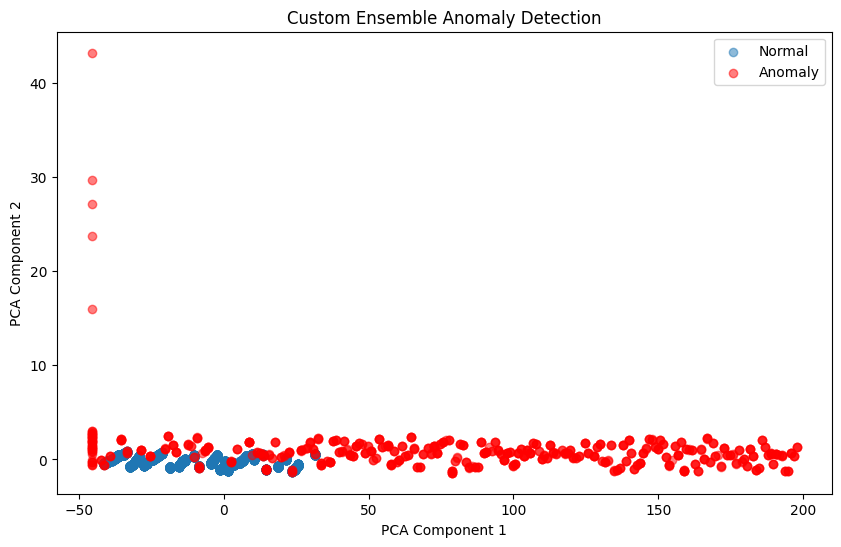

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Create a scatter plot of the results
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[combined_predictions == 1, 0], reduced_data[combined_predictions == 1, 1], label='Normal', alpha=0.5)
plt.scatter(reduced_data[combined_predictions == -1, 0], reduced_data[combined_predictions == -1, 1], label='Anomaly', color='red', alpha=0.5)
plt.title('Custom Ensemble Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
